## TP 4 Sesto

In [47]:
%matplotlib inline
# %matplotlib
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

#####  Función de lectura de imagenes.
Lee las imágenes a comparar en formato BGR y las devuelve en escala de grises:

In [48]:
def cargar_imagenes(path1, path2, show = True):
    img = cv.imread(path1)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img2 = cv.imread(path2)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
    
    if show:
        fig = plt.figure(figsize=(8,8), dpi=140)
        ax1=plt.subplot(121)
        ax1.imshow(img)
        ax1.axis("off");
        ax1=plt.subplot(122)
        ax1.imshow(img2)
        ax1.axis("off");
    return gray, gray2

##### Extractor de características LBP básico (sin uniformidad, 8 vecinos)
Para cada pixel de la imagen, compara el peso con respecto a sus 8 vecinos. En caso de cada vecino,al ser mayor o igual que el valor del pixel se guarda el bit en 1, caso contrario en 0 y luego hace la suma de ese binario para definir el valor de ese pixel en el LBP.

In [36]:
def lbp(img):
    filas = img.shape[0]
    columnas = img.shape[1]
    # Indices de los pixelesvecinos comenzando en -1,0 y recorriendo anti-horario.
    h_idx = np.array([-1, -1,  0,  1,  1,  1,  0, -1])
    v_idx = np.array([ 0,  1,  1,  1,  0, -1, -1, -1])    
    lbp = np.zeros((filas, columnas))
    
    for x in range(1, columnas - 1):
        for y in range(1, filas - 1):
            # Valores del pixel y de los vecinos.
            pixel = img[y, x]
            nb = img[v_idx + y, h_idx + x]
            # Solo se considera si el peso del vecino(nb) es mayor al peso del pixel.
            considerar = (nb >= pixel)
            lbp[y, x] = np.sum((2**np.arange(8)) * considerar)            
    return lbp[1:-1, 1:-1]

##### Comparación de histogramas

In [49]:
def plotear_resultados(lbp1, lbp2):
    f, axs = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 2]}, figsize=(14,14))
    axs[0, 0].imshow(lbp1, 'gray', vmin=0, vmax=2**8)
    axs[0, 0].axis("off")
    axs[0, 1].imshow(lbp2, 'gray', vmin=0, vmax=2**8)
    axs[0, 1].axis("off")
    axs[1, 0].hist(lbp1.ravel(), 20)
    axs[1, 1].hist(lbp2.ravel(), 20);

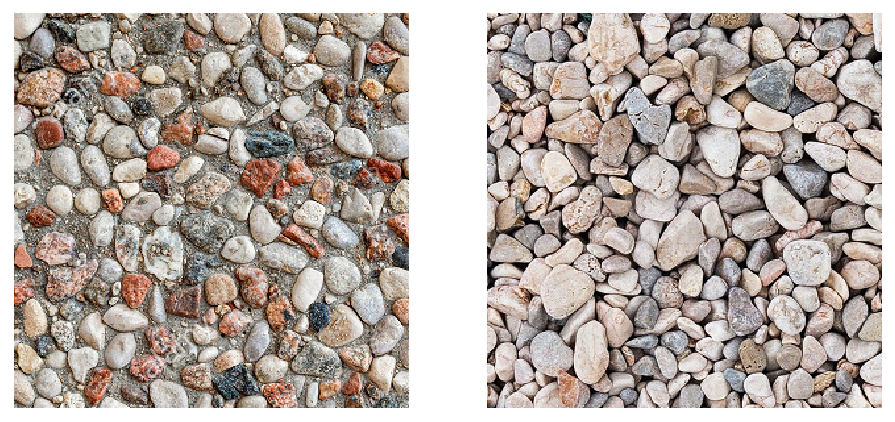

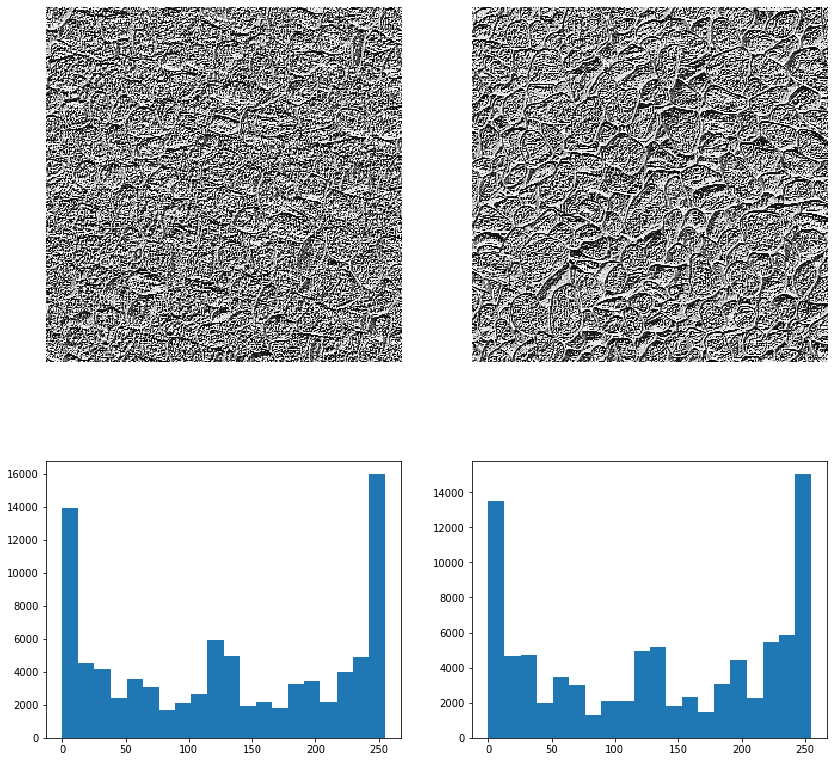

In [50]:
# Ejemplo 1: Piedras
img1, img2 = cargar_imagenes('./piedras1.png', './piedras2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plotear_resultados(lbp1, lbp2)

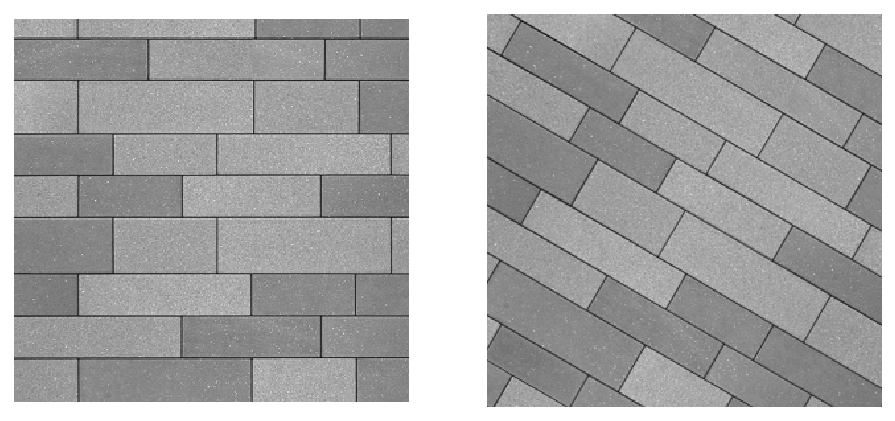

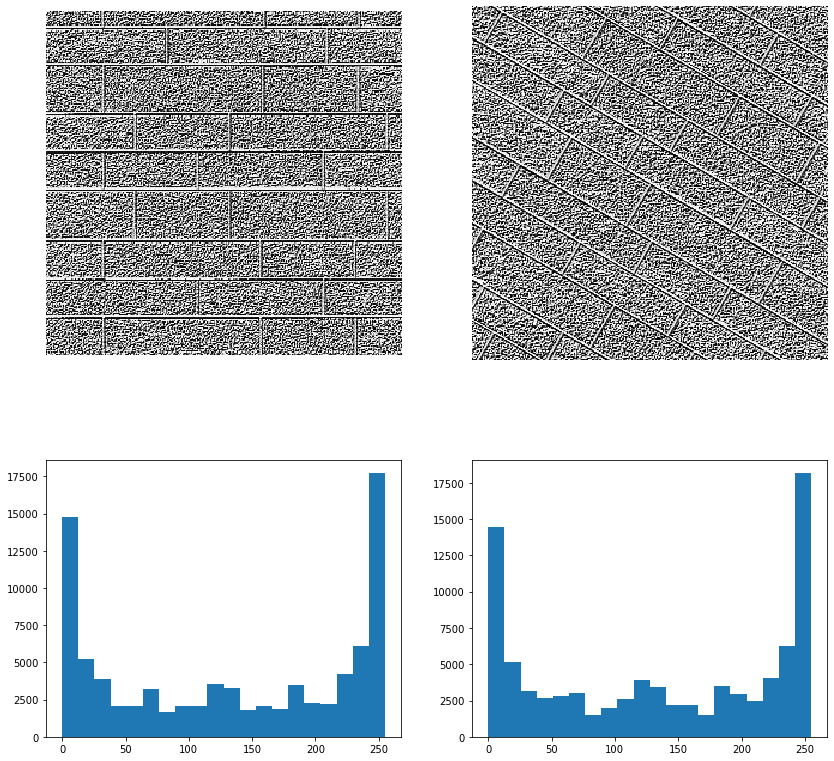

In [52]:
# Ejemplo 2: Ladrillos
img1, img2 = cargar_imagenes('./ladrillos1.png', './ladrillos2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plotear_resultados(lbp1, lbp2)

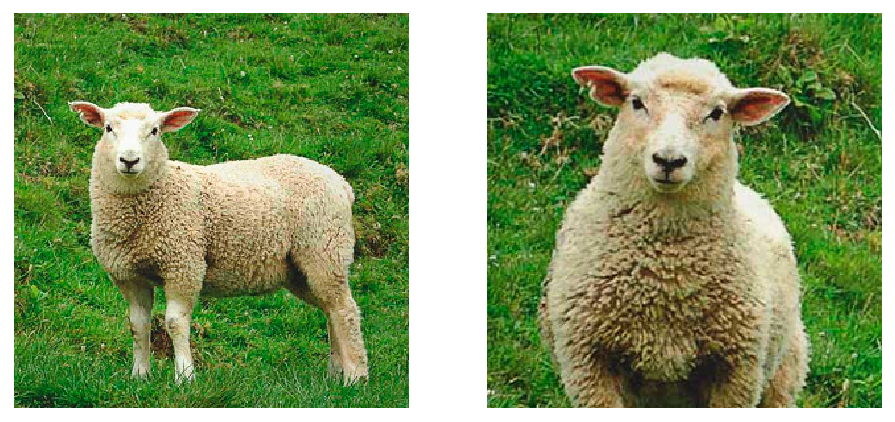

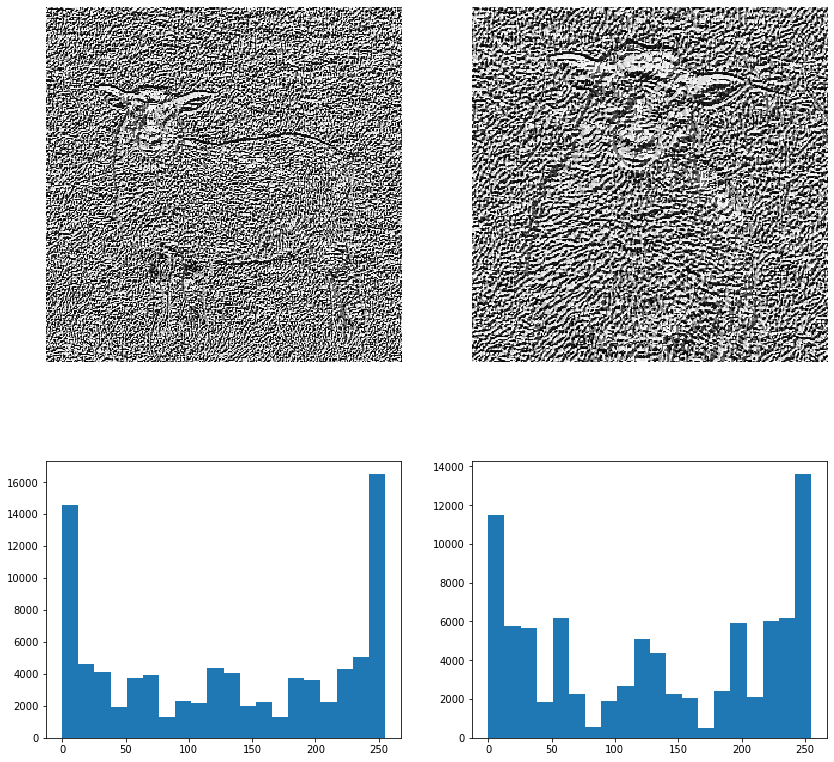

In [53]:
# Ejemplo 4: Oveja
img1, img2 = cargar_imagenes('./oveja1.png', './oveja2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plotear_resultados(lbp1, lbp2)

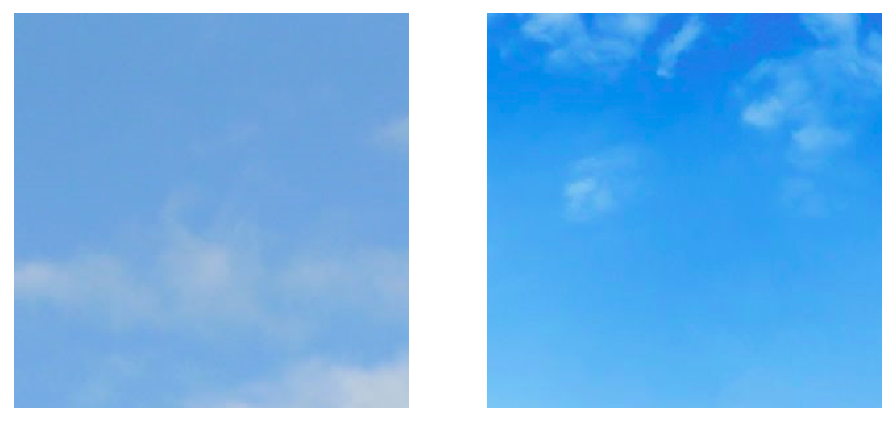

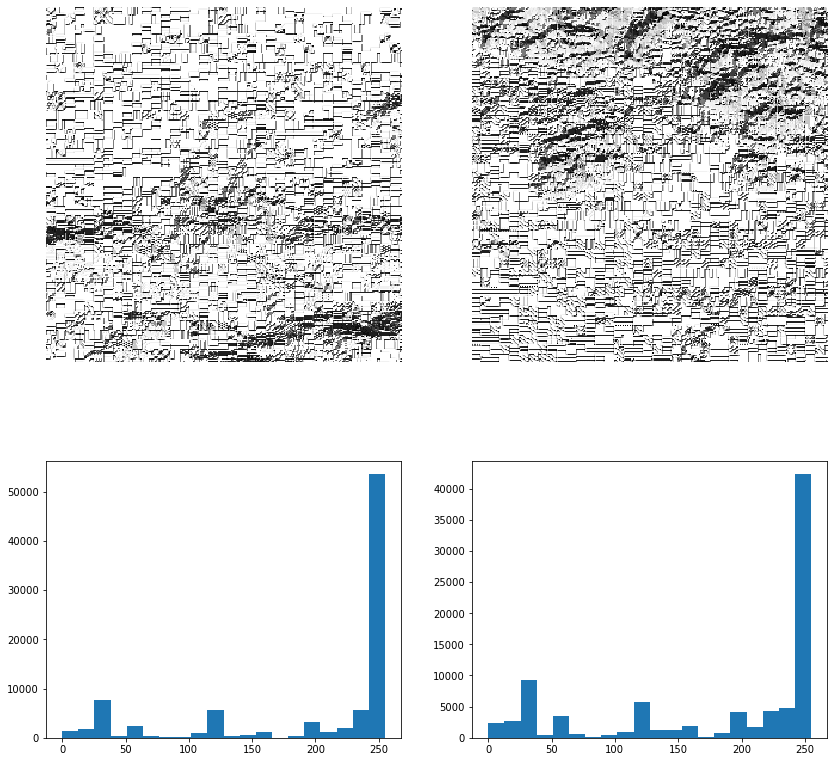

In [57]:
# Ejemplo 3: Cielo
img1, img2 = cargar_imagenes('./cielo.png', './cielo2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plotear_resultados(lbp1, lbp2)